In [20]:
import pandas as pd
import numpy as np
import joblib
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Load the data
data = pd.read_csv('loan_data.csv')

# Preprocess the data
label_encoders = {}
for column in ['Gender', 'Married', 'Education', 'Self_Employed', 'Area', 'Loan_Status']:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    label_encoders[column] = le
    joblib.dump(le, f'label_encoder_{column.lower()}.pkl')

# Define features and target variable
X = data.drop('Loan_Status', axis=1)
y = data['Loan_Status']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train three models
log_model = LogisticRegression()
log_model.fit(X_train, y_train)
log_pred = log_model.predict(X_test)
log_accuracy = accuracy_score(y_test, log_pred)

rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_pred)

svc_model = SVC()
svc_model.fit(X_train, y_train)
svc_pred = svc_model.predict(X_test)
svc_accuracy = accuracy_score(y_test, svc_pred)

# Save the models
joblib.dump(log_model, 'logistic_regression_model.pkl')
joblib.dump(rf_model, 'random_forest_model.pkl')
joblib.dump(svc_model, 'svc_model.pkl')

# Save the accuracies to a file
model_accuracies = {
    'Logistic Regression': log_accuracy,
    'Random Forest': rf_accuracy,
    'Support Vector Classifier': svc_accuracy
}
joblib.dump(model_accuracies, 'model_accuracies.pkl')


['model_accuracies.pkl']

Logistic Regression Accuracy: 0.74
Random Forest Accuracy: 0.72
Support Vector Classifier Accuracy: 0.73


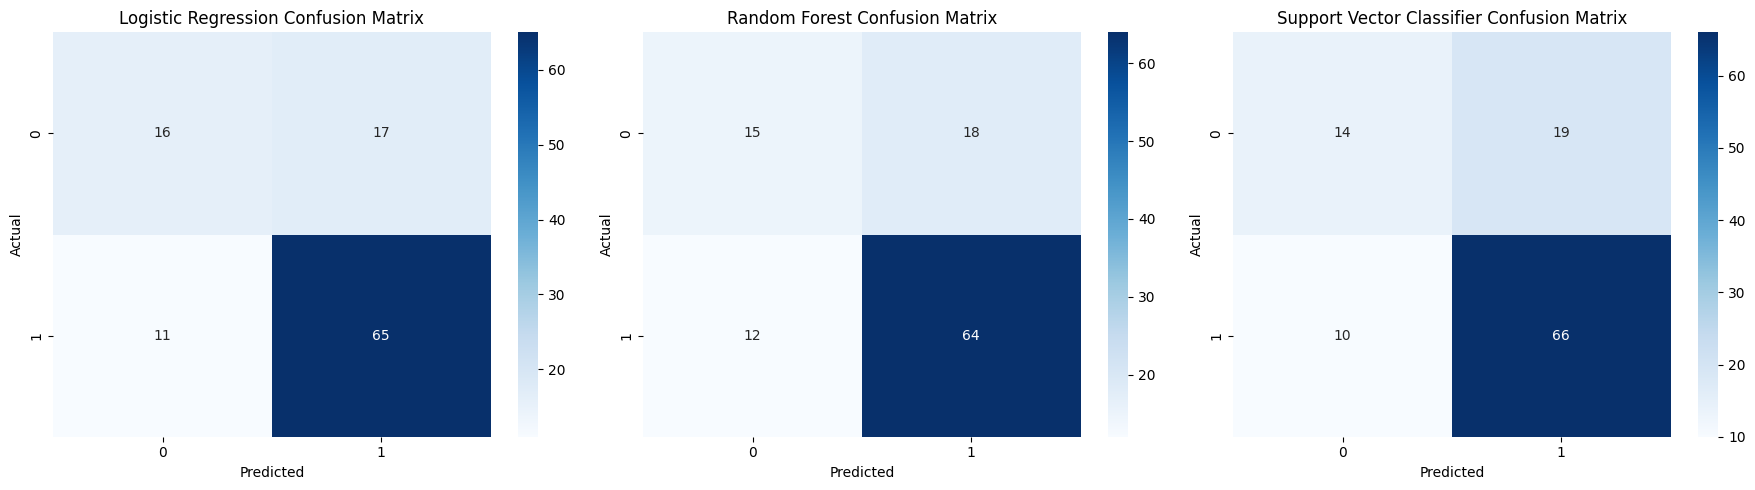

Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.59      0.48      0.53        33
           1       0.79      0.86      0.82        76

    accuracy                           0.74       109
   macro avg       0.69      0.67      0.68       109
weighted avg       0.73      0.74      0.74       109

Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.56      0.45      0.50        33
           1       0.78      0.84      0.81        76

    accuracy                           0.72       109
   macro avg       0.67      0.65      0.66       109
weighted avg       0.71      0.72      0.72       109

Support Vector Classifier Classification Report:
               precision    recall  f1-score   support

           0       0.58      0.42      0.49        33
           1       0.78      0.87      0.82        76

    accuracy                           0.73       

In [21]:

# Predictions
log_pred = log_model.predict(X_test)
rf_pred = rf_model.predict(X_test)
svc_pred = svc_model.predict(X_test)

# Calculate accuracies
log_accuracy = accuracy_score(y_test, log_pred)
rf_accuracy = accuracy_score(y_test, rf_pred)
svc_accuracy = accuracy_score(y_test, svc_pred)

print(f'Logistic Regression Accuracy: {log_accuracy:.2f}')
print(f'Random Forest Accuracy: {rf_accuracy:.2f}')
print(f'Support Vector Classifier Accuracy: {svc_accuracy:.2f}')

# Generate confusion matrices
log_cm = confusion_matrix(y_test, log_pred)
rf_cm = confusion_matrix(y_test, rf_pred)
svc_cm = confusion_matrix(y_test, svc_pred)

# Plot confusion matrices
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

sns.heatmap(log_cm, annot=True, fmt='d', ax=axes[0], cmap='Blues')
axes[0].set_title('Logistic Regression Confusion Matrix')
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('Actual')

sns.heatmap(rf_cm, annot=True, fmt='d', ax=axes[1], cmap='Blues')
axes[1].set_title('Random Forest Confusion Matrix')
axes[1].set_xlabel('Predicted')
axes[1].set_ylabel('Actual')

sns.heatmap(svc_cm, annot=True, fmt='d', ax=axes[2], cmap='Blues')
axes[2].set_title('Support Vector Classifier Confusion Matrix')
axes[2].set_xlabel('Predicted')
axes[2].set_ylabel('Actual')

plt.tight_layout()
plt.show()

# Classification reports
print("Logistic Regression Classification Report:\n", classification_report(y_test, log_pred))
print("Random Forest Classification Report:\n", classification_report(y_test, rf_pred))
print("Support Vector Classifier Classification Report:\n", classification_report(y_test, svc_pred))


In [19]:
import streamlit as st
import pandas as pd
import joblib
import numpy as np

# Load the saved models
log_model = joblib.load('logistic_regression_model.pkl')
rf_model = joblib.load('random_forest_model.pkl')
svc_model = joblib.load('svc_model.pkl')

# Load the label encoders
label_encoders = {
    'Gender': joblib.load('label_encoder_gender.pkl'),
    'Married': joblib.load('label_encoder_married.pkl'),
    'Education': joblib.load('label_encoder_education.pkl'),
    'Self_Employed': joblib.load('label_encoder_self_employed.pkl'),
    'Area': joblib.load('label_encoder_area.pkl')
}

# Function to encode input data
def encode_input(data):
    for column in label_encoders:
        data[column] = label_encoders[column].transform([data[column]])[0]
    return data

# Streamlit app layout
st.title("Loan Eligibility Prediction")

# User input fields
gender = st.selectbox("Gender", ["Male", "Female"])
married = st.selectbox("Marital Status", ["Yes", "No"])
dependents = st.selectbox("Number of Dependents", ["0", "1", "2", "3+"])
education = st.selectbox("Education", ["Graduate", "Not Graduate"])
self_employed = st.selectbox("Self Employed", ["Yes", "No"])
applicant_income = st.number_input("Applicant Income", min_value=0)
coapplicant_income = st.number_input("Coapplicant Income", min_value=0)
loan_amount = st.number_input("Loan Amount", min_value=0)
term = st.selectbox("Loan Term (months)", [120, 360])
credit_history = st.selectbox("Credit History", [0, 1])
area = st.selectbox("Area", ["Urban", "Semiurban", "Rural"])

# Button to predict
if st.button("Predict"):
    # Prepare the input data
    input_data = {
        "Gender": gender,
        "Married": married,
        "Dependents": dependents,
        "Education": education,
        "Self_Employed": self_employed,
        "Applicant_Income": applicant_income,
        "Coapplicant_Income": coapplicant_income,
        "Loan_Amount": loan_amount,
        "Term": term,
        "Credit_History": credit_history,
        "Area": area
    }
    
    input_df = pd.DataFrame(input_data, index=[0])
    
    # Encode the input data
    encoded_input = encode_input(input_df)

    # Make predictions
    log_pred = log_model.predict(encoded_input)
    rf_pred = rf_model.predict(encoded_input)
    svc_pred = svc_model.predict(encoded_input)

    # Display the results
    st.subheader("Predictions:")
    st.write(f"Logistic Regression Prediction: {'Approved' if log_pred[0] == 1 else 'Not Approved'}")
    st.write(f"Random Forest Prediction: {'Approved' if rf_pred[0] == 1 else 'Not Approved'}")
    st.write(f"Support Vector Classifier Prediction: {'Approved' if svc_pred[0] == 1 else 'Not Approved'}")


2024-11-12 08:09:08.471 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-12 08:09:08.833 
  command:

    streamlit run C:\Users\oumat\AppData\Local\Programs\Python\Python312\Lib\site-packages\ipykernel_launcher.py [ARGUMENTS]
2024-11-12 08:09:08.835 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-12 08:09:08.838 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-12 08:09:08.841 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-12 08:09:08.844 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-12 08:09:08.845 Session state does not function when running a script without `streamlit run`
2024-11-12 08:09:08.847 Thread 'MainThrea